In [2]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load lại mô hình đã lưu
model_path = "/content/drive/MyDrive/Biển báo giao thông/model_test.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Định nghĩa hàm dự đoán
def predict_traffic_sign(image_path):
    # Đọc hình ảnh từ đường dẫn
    image = cv2.imread(image_path)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((30, 30))
    expand_input = np.expand_dims(resize_image, axis=0)
    input_data = np.array(expand_input)
    input_data = input_data / 255.0

    # Dự đoán từ hình ảnh
    pred = loaded_model.predict(input_data)
    result = pred.argmax()
    return result

In [3]:
# Label Overview
classes = { 0:'Giới hạn tốc độ (20km/h)',
            1:'Giới hạn tốc độ (30km/h)',
            2:'Giới hạn tốc độ (50km/h)',
            3:'Giới hạn tốc độ (60km/h)',
            4:'Giới hạn tốc độ (70km/h)',
            5:'Giới hạn tốc độ (80km/h)',
            6:'Hết giới hạn tốc độ (80km/h)',
            7:'Giới hạn tốc độ (100km/h)',
            8:'Giới hạn tốc độ (120km/h)',
            9:'Không ',
            10:'Cấm vượt xe trên 3,5 tấn',
            11:'Quyền ưu tiên tại giao lộ',
            12:'Đường ưu tiên',
            13:'Biển nhường đường',
            14:'Stop',
            15:'Cấm đỗ xe',
            16:'Cấm xe > 3,5 ',
            17:'Đường một chiều',
            18:'Nguy Hiểm',
            19:'Nguy hiểm rẽ trái',
            20:'Nguy Hiểm rẽ phải',
            21:'Đường ngoằn ngoèo ',
            22:'Đường gập ghềnh',
            23:'Đường trơn',
            24:'Đường hẹp bên phải',
            25:'Đường đang thi ',
            26:'Đèn giao ',
            27:'Người đi bộ',
            28:'Trẻ em qua đường',
            29:'Xe đạp qua đường',
            30:'Coi trừng băng tuyết',
            31:'Động vật băng ',
            32:'Hết mọi lệnh cấm',
            33:'Rẽ phải về phía trước',
            34:'Rẽ trái về phía trước',
            35:'Chỉ được đi thẳng',
            36:'Đi thằng hoặc rẽ phải',
            37:'Đi thằng hoặc rẽ trái',
            38:'Đi bên phải',
            39:'Đi bên trái',
            40:'Vòng xuyến',
            41:'Kết thúc không đi qua',
            42:'tonsXe không vợt quá 3,5 tấn' }

1/1 [==============================] - 0s 22ms/step
Predicted traffic sign: 17 Đường một chiều


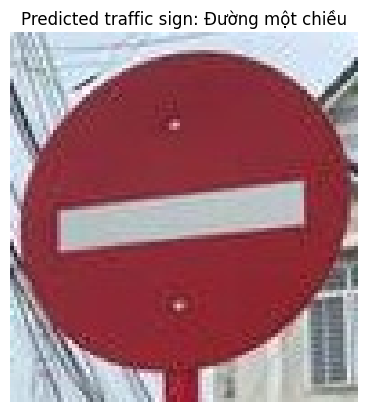

In [11]:
# Đường dẫn đến hình ảnh bạn muốn dự đoán
image_path = "/content/drive/MyDrive/Biển báo giao thông/Test_3.jpg"

# Dự đoán từ hình ảnh
predicted_class = predict_traffic_sign(image_path)
sign_name = classes[predicted_class]  # Đảm bảo biến 'classes' đã được định nghĩa trước đó

# In ra tên biển báo dự đoán và hiển thị hình ảnh
print("Predicted traffic sign:", predicted_class, sign_name)

# Hiển thị hình ảnh
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Predicted traffic sign: " + sign_name)
plt.show()